# EDA and Data Processing

This notebook contains exploratory data analysis (EDA) and data processing steps for the consumer complaints dataset. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
file_path = '/content/drive/MyDrive/data/complaints.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-2-1734848067.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
print(df.head())

  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1       

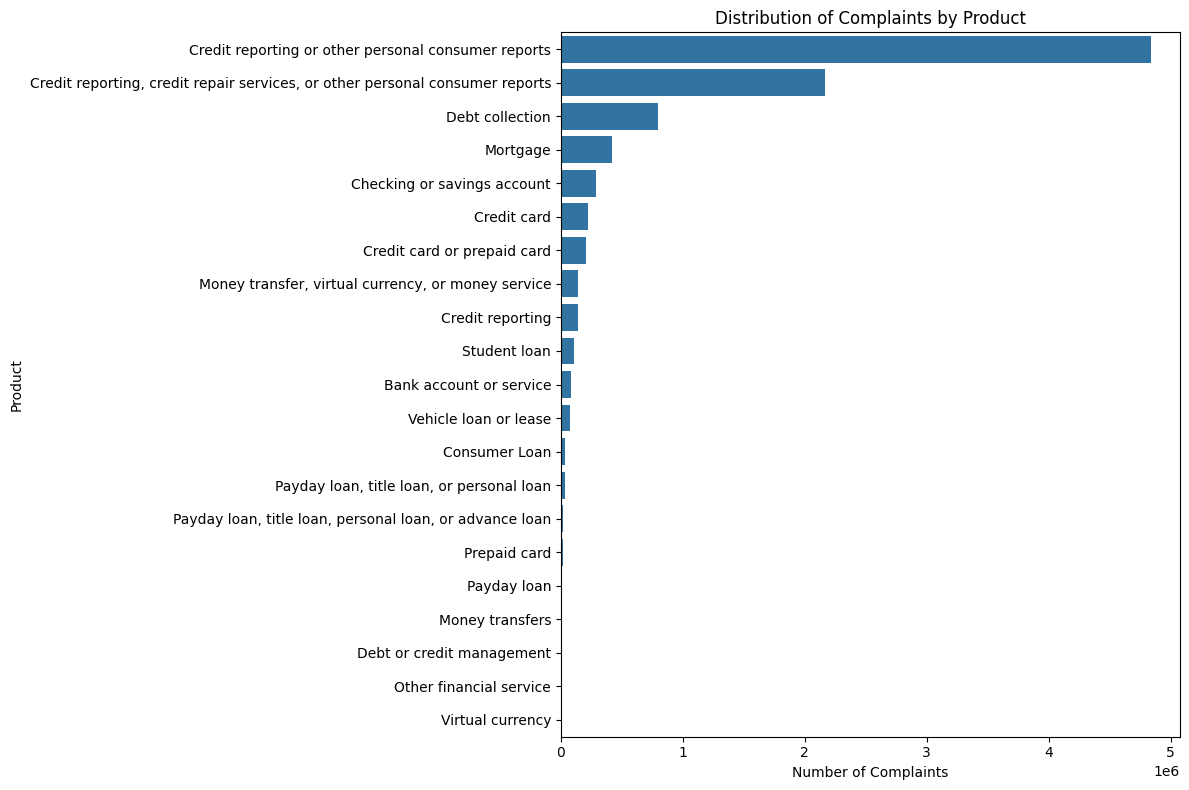

In [4]:
product_distribution = df['Product'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=product_distribution.values, y=product_distribution.index)
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.title('Distribution of Complaints by Product')
plt.tight_layout()
plt.show()

In [5]:
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(str(x).split()))

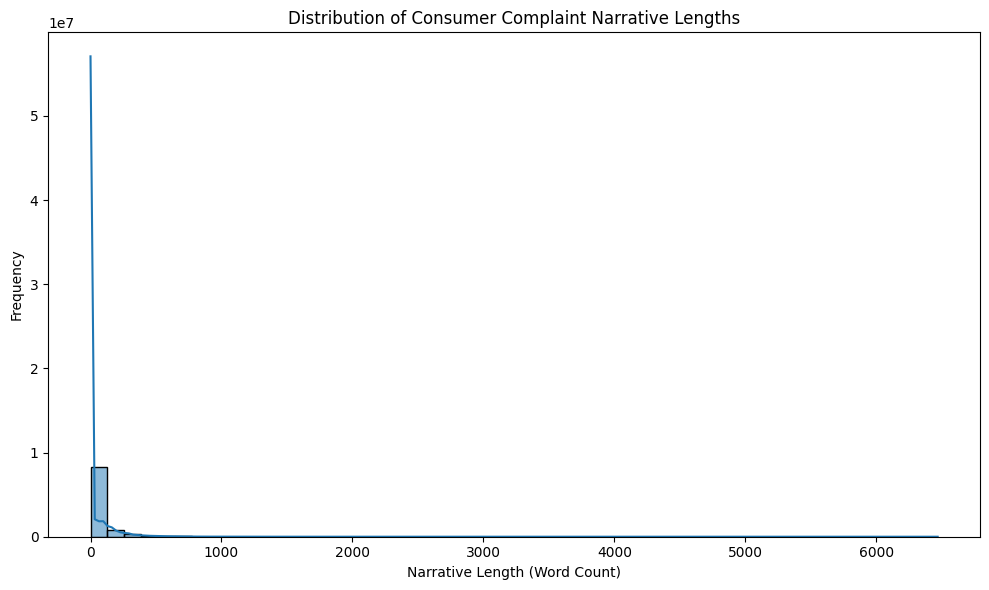

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='narrative_length', bins=50, kde=True)
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.title('Distribution of Consumer Complaint Narrative Lengths')
plt.tight_layout()
plt.show()

In [7]:
print(df['narrative_length'].describe())

min_narrative_length = df['narrative_length'].min()
max_narrative_length = df['narrative_length'].max()

print(f"Minimum narrative length: {min_narrative_length}")
print(f"Maximum narrative length: {max_narrative_length}")

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64
Minimum narrative length: 0
Maximum narrative length: 6469


In [8]:
complaints_with_narratives = df['Consumer complaint narrative'].notna().sum()
complaints_without_narratives = df['Consumer complaint narrative'].isna().sum()

print(f"Number of complaints with narratives: {complaints_with_narratives}")
print(f"Number of complaints without narratives: {complaints_without_narratives}")

Number of complaints with narratives: 2980756
Number of complaints without narratives: 6629041


In [9]:
print("Unique products in the original DataFrame:")
print(df['Product'].unique())

Unique products in the original DataFrame:
['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


In [10]:
specific_products =[
    'Credit card',
    'Credit card or prepaid card',
    'Payday loan, title loan, or personal loan',
    'Payday loan, title loan, personal loan, or advance loan',
    'Checking or savings account',
    'Money transfers',
    'Money transfer, virtual currency, or money service'
]

In [11]:
for product in specific_products:
    sub_products = df[df['Product'] == product]['Sub-product'].unique()
    print(f"Unique sub-products for '{product}':")
    print(sub_products)
    print("-" * 30)

Unique sub-products for 'Credit card':
['General-purpose credit card or charge card' 'Store credit card' nan]
------------------------------
Unique sub-products for 'Credit card or prepaid card':
['General-purpose credit card or charge card' 'Store credit card'
 'General-purpose prepaid card' 'Government benefit card' 'Payroll card'
 'Gift card' 'Student prepaid card' nan]
------------------------------
Unique sub-products for 'Payday loan, title loan, or personal loan':
['Title loan' 'Installment loan' 'Personal line of credit' 'Payday loan'
 'Pawn loan' nan]
------------------------------
Unique sub-products for 'Payday loan, title loan, personal loan, or advance loan':
['Payday loan' 'Personal line of credit' 'Installment loan'
 'Other advances of future income' 'Title loan' 'Earned wage access'
 'Pawn loan' 'Tax refund anticipation loan or check']
------------------------------
Unique sub-products for 'Checking or savings account':
['Checking account' 'Savings account' 'Other banki

In [12]:
# --- Credit Card Filter ---
credit_card_filter1 = (
    df['Product'].isin(['Credit card'])
)

credit_card_filter2 = (
    df['Product'].isin(['Credit card or prepaid card']) &
    df['Sub-product'].isin(['General-purpose credit card or charge card', 'Store credit card'])
)

# --- Personal Loan Filter ---
personal_loan_products = [
    'Payday loan, title loan, personal loan, or advance loan',
    'Payday loan, title loan, or personal loan'
]
personal_loan_subproducts = [
    'Installment loan', 'Personal line of credit',
    'Earned wage access', 'Other advances of future income'
]
personal_loan_filter = (
    df['Product'].isin(personal_loan_products) &
    df['Sub-product'].isin(personal_loan_subproducts)
)

# --- Savings Account Filter ---
savings_filter = (
    df['Product'].isin(['Checking or savings account']) &
    df['Sub-product'].isin(['Savings account'])
)

# --- Money Transfers Filter ---
money_transfer_filter1 = (
    df['Product'].isin(['Money transfers'])
)

money_transfer_subproducts = [
    'International money transfer',
    'Domestic (US) money transfer'
]
money_transfer_filter2 = (
    df['Product'].isin(['Money transfer, virtual currency, or money service']) &
    df['Sub-product'].isin(money_transfer_subproducts)
)

# --- Combine All Filters ---
final_filter = (
    credit_card_filter1 |
    credit_card_filter2 |
    personal_loan_filter |
    savings_filter |
    money_transfer_filter1 |
    money_transfer_filter2
)

filtered_df = df[final_filter]


In [13]:
print(f"Number of records after filtering: {len(filtered_df)}")
display(filtered_df.head())

Number of records after filtering: 559455


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
334,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,75104,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196294,0
595,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,CA,92553,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196854,0
661,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77346,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196870,0
687,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,77346,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196880,0
795,2025-06-20,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,71108,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197003,0


In [14]:
filtered_df["Product"].unique()

array(['Credit card',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account',
       'Payday loan, title loan, personal loan, or advance loan',
       'Credit card or prepaid card', 'Money transfers',
       'Payday loan, title loan, or personal loan'], dtype=object)

In [15]:
filtered_df["Sub-product"].unique()

array(['General-purpose credit card or charge card',
       'Domestic (US) money transfer', 'Savings account',
       'Store credit card', 'Personal line of credit', 'Installment loan',
       'International money transfer', 'Other advances of future income',
       'Earned wage access', nan], dtype=object)

In [16]:
filtered_df_further_with_narratives = filtered_df.dropna(subset=['Consumer complaint narrative'])

print(f"Number of records after removing empty narratives: {len(filtered_df_further_with_narratives)}")
display(filtered_df_further_with_narratives.head())

Number of records after removing empty narratives: 272371


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170


In [ ]:
def clean_narrative(narrative):
    """
    Cleans the consumer complaint narrative text.

    Args:
        narrative: The input string containing the narrative.

    Returns:
        The cleaned string, or an empty string if the input is not a string.
    """
    if not isinstance(narrative, str):
        return ''

    # Convert to lowercase
    cleaned_text = narrative.lower()

    # Remove special characters (keep letters, numbers, and spaces)
    cleaned_text = re.sub(r'[^a-z0-9\s]', '', cleaned_text)

    cleaned_text = cleaned_text.replace('\n', ' ').replace('\r', ' ')
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text) # remove extra whitespace

    # Remove specific boilerplate phrases
    boilerplate_phrases = [ "i am writing to file a complaint", "i am writing to complain",
                           "i am writing to report","i am writing to inform",
                            "thank you for your attention", "thank you for your time",
                            "dear sir or madam", "dear sir", "dear madam",
                            "this is a formal complaint", "sincerely"]
    for phrase in boilerplate_phrases:
        cleaned_text = cleaned_text.replace(phrase, '')

    # Remove leading/trailing whitespace
    cleaned_text = cleaned_text.strip()

    return cleaned_text

In [18]:
filtered_df_further_with_narratives['cleaned_narrative'] = filtered_df_further_with_narratives['Consumer complaint narrative'].apply(clean_narrative)
display(filtered_df_further_with_narratives[['Consumer complaint narrative', 'cleaned_narrative']].head())

,Consumer complaint narrative,cleaned_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb i have a secured credit card with ci...
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards the credit balance...
13955,b'I am writing to dispute the following charge...,bi am writing to dispute the following charges...
14249,"Although the account had been deemed closed, I...",although the account had been deemed closed i ...


In [ ]:
# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save the DataFrame to a CSV file
filtered_df_further_with_narratives.to_csv('data/filtered_complaints.csv', index=False)

print("Cleaned and filtered dataset saved to data/filtered_complaints.csv")

Cleaned and filtered dataset saved to data/filtered_complaints.csv


## Summary of Key Findings from EDA

During the exploratory data analysis (EDA), we examined the distribution of complaints across different products and sub-products, as well as the characteristics of the consumer complaint narratives. The data revealed that certain financial products, such as credit cards, personal loans, and money transfers, are more frequently associated with consumer complaints. Filtering and categorizing the data by product and sub-product allowed for a more focused analysis of specific complaint types and their prevalence.


Additionally, the analysis of the narrative lengths showed a wide range in the amount of detail provided by consumers, with some complaints being very brief and others quite extensive. The cleaning and preprocessing steps, including the removal of boilerplate language and special characters, helped standardize the narratives for further analysis. Overall, the EDA provided valuable insights into the nature and distribution of consumer complaints, setting the stage for more advanced text analysis and modeling.

## Import Required Libraries
This cell imports the necessary libraries for data manipulation, visualization, and text processing.
## Load the Dataset
This cell loads the consumer complaints dataset from a CSV file into a pandas DataFrame.
## Preview the Data
This cell displays the first few rows of the DataFrame to provide an overview of the data structure and contents.
## Visualize Product Distribution
This cell calculates and visualizes the distribution of complaints across different financial products using a bar plot.
## Calculate Narrative Length
This cell computes the word count for each consumer complaint narrative and adds it as a new column to the DataFrame.
## Visualize Narrative Length Distribution
This cell visualizes the distribution of narrative lengths (word counts) using a histogram.
## Narrative Length Statistics
This cell prints descriptive statistics for the narrative lengths, including minimum and maximum values.
## Count Complaints With and Without Narratives
This cell counts and prints the number of complaints that have narratives and those that do not.
## List Unique Products
This cell lists all unique product categories present in the original DataFrame.
## Define Specific Product Categories
This cell defines a list of specific product categories for further filtering and analysis.
## List Unique Sub-products for Each Product
This cell lists unique sub-products for each specified product category.
## Define and Apply Product Filters
This cell defines filters for various product and sub-product combinations and applies them to the DataFrame to create a filtered dataset.
## Display Filtered Data
This cell displays the number of records after filtering and shows the first few rows of the filtered DataFrame.
## List Unique Products in Filtered Data
This cell lists unique product categories present in the filtered DataFrame.
## List Unique Sub-products in Filtered Data
This cell lists unique sub-product categories present in the filtered DataFrame.
## Remove Empty Narratives
This cell removes records with empty consumer complaint narratives from the filtered DataFrame and displays the result.
## Define Narrative Cleaning Function
This cell defines a function to clean the consumer complaint narratives by removing special characters, boilerplate phrases, and extra whitespace.
## Apply Narrative Cleaning
This cell applies the cleaning function to the narratives and displays the cleaned text alongside the original.
## Save Cleaned and Filtered Data
This cell saves the cleaned and filtered DataFrame to a CSV file for future use.